In [5]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
distr = scipy.stats.norm()

#### Standard Error of the Mean

(-1.0, 3.0)

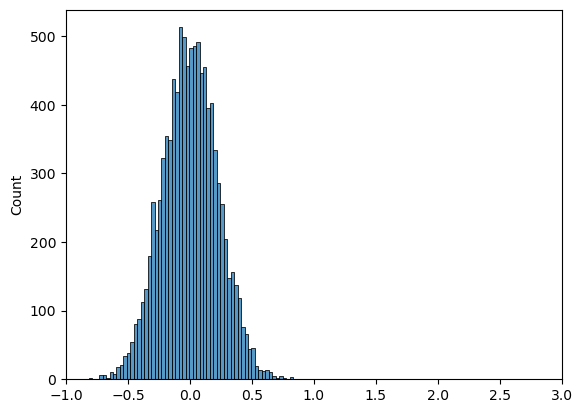

In [4]:
means = []

for i in range(10000):
    sample = distr.rvs(20)
    means.append(sample.mean())

fig, ax = plt.subplots()
sns.histplot(means, ax=ax)
ax.set_xlim(-1, 3)

In [6]:
df = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip')

In [8]:
popmean=df['jsc'].mean()
print(f"Population mean: {popmean}")

Population mean: 120.46948830191943


In [9]:
random_sample = df['jsc'].sample(n=500)

In [10]:
small_mass_sample = df.sort_values(by='mass').iloc[:500]['jsc']

In [23]:
df.sort_values(by='mass').tail(10)

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
1453031,2100819,c1c[se]c(c1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3cc[...,C22H10S3Se4,686.359,3.491911,0.372659,144.211321,-4.972659,1.710349,-3.262310,c1ccc([se]1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3cc[...
2174115,2395376,c1cc2csc(-c3sc(-c4ccc([se]4)-c4scc5[se]ccc45)c...,C22H10S3Se4,686.359,3.607274,0.410628,135.200490,-5.010628,1.760545,-3.250083,c1sc(-c2sc(-c3ccc([se]3)-c3scc4[se]ccc34)c3cc[...
2078758,1932458,c1cc2csc(-c3ccc([se]3)-c3sc(-c4scc5cc[se]c45)c...,C22H10S3Se4,686.359,3.182133,0.372708,131.400556,-4.972708,1.780890,-3.191818,c1sc(-c2ccc([se]2)-c2sc(-c3scc4cc[se]c34)c3[se...
2174073,1674313,c1cc2csc(-c3sc(-c4ccc([se]4)-c4scc5[se]ccc45)c...,C22H10S3Se4,686.359,3.345704,0.365229,140.983873,-4.965229,1.730501,-3.234729,c1sc(-c2sc(-c3ccc([se]3)-c3scc4[se]ccc34)c3[se...
1456440,2638094,c1c[se]c(c1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3[se...,C22H10S3Se4,686.359,3.674986,0.354503,159.545234,-4.954503,1.637787,-3.316716,c1ccc([se]1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3[se...
1454969,2173747,c1c[se]c(c1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3cc[...,C22H10S3Se4,686.359,3.310891,0.393337,129.547072,-4.993337,1.790304,-3.203033,c1ccc([se]1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3cc[...
2074606,2407369,c1cc2csc(-c3ccc([se]3)-c3sc(-c4scc5cc[se]c45)c...,C22H10S3Se4,686.359,3.044733,0.344115,136.173774,-4.944115,1.753864,-3.190251,c1sc(-c2ccc([se]2)-c2sc(-c3scc4cc[se]c34)c3cc[...
1454550,3089645,c1c[se]c(c1)-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[...,C22H10S3Se4,686.359,3.036713,0.372103,125.599652,-4.972103,1.812920,-3.159183,c1ccc([se]1)-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[...
1456533,2578907,c1c[se]c(c1)-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[...,C22H10S3Se4,686.359,3.185788,0.344061,142.504759,-4.944061,1.720578,-3.223483,c1ccc([se]1)-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[...
2076721,1825961,c1cc2csc(-c3ccc([se]3)-c3sc(-c4scc5[se]ccc45)c...,C22H10S3Se4,686.359,3.361639,0.363052,142.504759,-4.963052,1.720357,-3.242696,c1sc(-c2ccc([se]2)-c2sc(-c3scc4[se]ccc34)c3cc[...


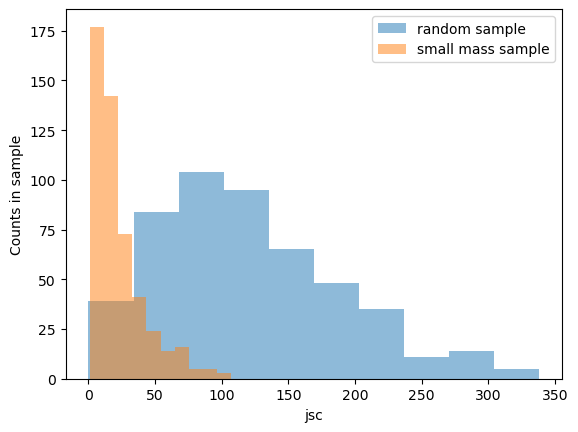

In [20]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, num=100)
ax.hist(x=random_sample, label='random sample', alpha=.5)
ax.hist(x=small_mass_sample, label='small mass sample', alpha=.5)
ax.set_xlabel('jsc')
ax.set_ylabel('Counts in sample')
plt.legend()

###  Single and double T test

In [22]:
scipy.stats.ttest_1samp(small_mass_sample, popmean=popmean, alternative='two-sided')

TtestResult(statistic=-111.98575076209326, pvalue=0.0, df=499)

<font size=3>This gives us a number to work with: __`pvalue` indicates significance of the result__. Since it is less than 0.01, we can say that we are 99% confident that the sample did not come randomly from the known population.
    
<font size=3>The `alternative='two_sided'` comes from the fact that we wanted to ask if the sample mean is either significantly __less__ or __more__. We can choose a different alternative.

<font size=5><center>What if instead of wanting to know if a population produced a sample, we cared that __two samples came from the same place (or were different?)__

In [24]:
scipy.stats.ttest_ind(small_mass_sample, random_sample, alternative='two-sided', equal_var=True)

Ttest_indResult(statistic=-29.936507299354687, pvalue=4.961093570695728e-141)

<font size=3>__Extremely unlikely that the two samples were randomly drawn from the same population (indeed they were not!)__.

###  Distribution of sample quantiles

<font size=4>For the Photovoltaic materials, we often care about the LUMO - HOMO energy gap. Specifically, we want it to be as low as possible. For this reason we may be intersted in estimating __the 10th percentile of the LUMO - HOMO gap__ in the data with some confidence.
    

In [25]:
data = df['e_lumo_alpha'] - df['e_homo_alpha']

In [26]:
qs = []
for i in range(100):
    s = data.sample(100)
    qs.append(s.quantile(.1))

<Axes: ylabel='Count'>

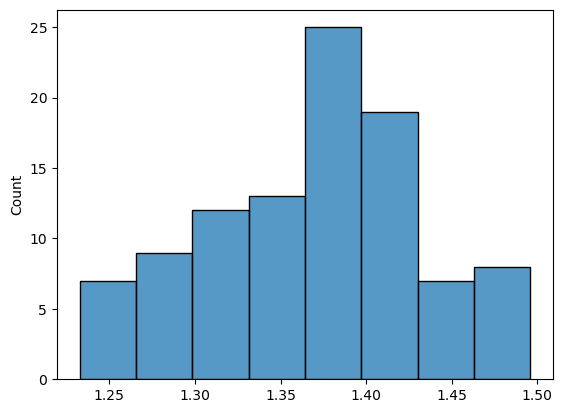

In [27]:
sns.histplot(qs)

In [29]:
distr = scipy.stats.gaussian_kde(qs)
prob = distr.integrate_box(-np.inf, 1.3)
print(f"The probability that the true 10th percentile is less than 1.3 is {prob}")

The probability that the true 10th percentile is less than 1.3 is 0.16500858166729285
